# Implementation with Keras 
---

### URL Dataset
[Wine Data set](https://archive.ics.uci.edu/ml/datasets/wine), from UCI - Machine Learning Repository 

### Presentation about Keras with implementation
[Workshop about TensorFlow and Keras](https://luiseduardogfranca.github.io/workshop-tensorflow/)
https://luiseduardogfranca.github.io/workshop-tensorflow/



* **Colaborators** 
  * [Luís Eduardo](https://github.com/luiseduardogfranca/)
  * [Émerson Silva](https://www.google.com)
---

Import libs

In [10]:
import numpy as np 
from data_proccesing import DataProcessing
from keras.models import Sequential
from keras.layers import Dense 
from keras.utils import to_categorical
from keras.optimizers import Adam 
from keras. initializers import TruncatedNormal 
import matplotlib.pyplot as plt

Data processing and load file **.npy**


In [11]:
dp = DataProcessing()
data = dp.processing('dataset/wine.data.txt', 14)

X_train, X_test = np.load('dataset/X_train.npy'), np.load('dataset/X_test.npy')
Y_train, Y_test = np.load('dataset/Y_train.npy'), np.load('dataset/Y_test.npy')

Convert array of class for a binary array

In [12]:
Y_train, Y_test = to_categorical(Y_train), to_categorical(Y_test)

Plot **heat map**

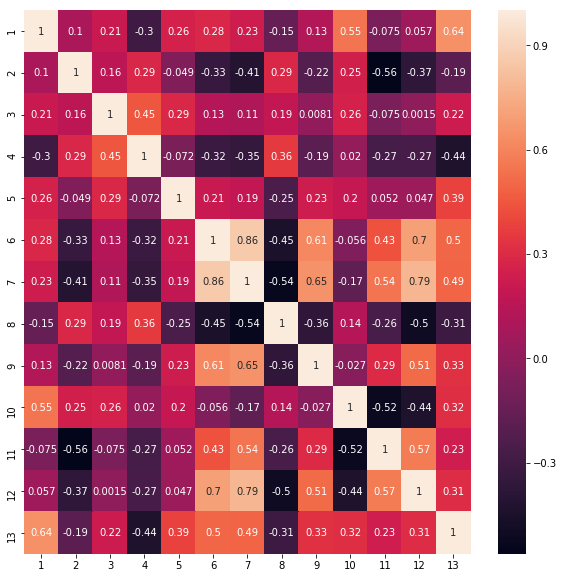

In [13]:
dp.plot_heat_map(10, data)

Config model of neural network

In [14]:
input_dim = len(X_train[0, :])
class_num = len(Y_train[0, :]) 

model = Sequential()
init = TruncatedNormal(stddev=0.01, seed=10)

#config model 
model.add(Dense(units=50, activation='relu', input_dim=input_dim, kernel_initializer=init))
model.add(Dense(units=class_num, activation='softmax', kernel_initializer=init))

#optimizer
adam = Adam(lr=0.007)

model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


Trains the network

In [15]:
history = model.fit(X_train, Y_train, epochs=800, validation_data=(X_test, Y_test), shuffle=False, verbose=0)


Plot the graph of accuracy

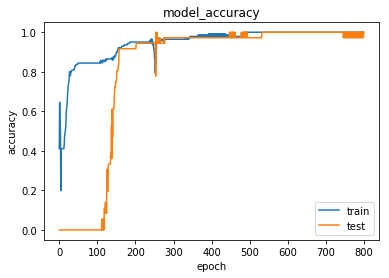

In [16]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

Plot the graph of loss

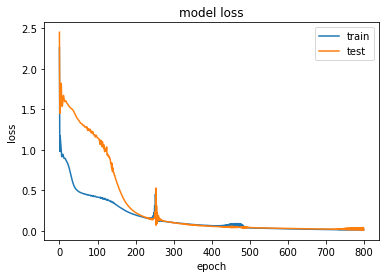

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()